In [1]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

print(cv.__version__)

3.4.2


(464, 460, 4)


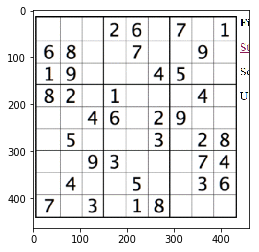

In [2]:
imagename = "SimpleBoard_1.png"
img = cv.imread(imagename, cv.IMREAD_UNCHANGED)
print(img.shape)
plt.imshow(img)
plt.show()

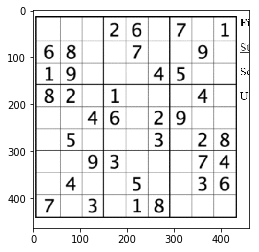

In [3]:
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
plt.imshow(img_gray, cmap="gray")

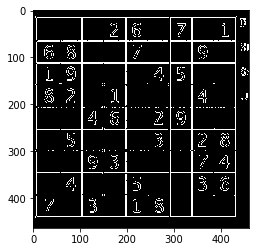

In [4]:
img_detected_edges = cv.Canny(img_gray, 60, 120)
plt.imshow(img_detected_edges, cmap="gray")

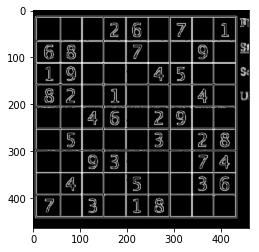

In [5]:
img_detected_edges_with_bilateral_fil = cv.bilateralFilter(img_detected_edges, 5, 300, 300)
plt.imshow(img_detected_edges_with_bilateral_fil, cmap="gray")

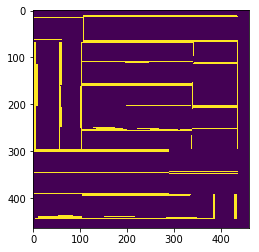

In [28]:
line_image = np.copy(img_gray) * 0

rho = 1
theta = np.pi / 180
threshold = 100 # minimal number of votes
min_line_length = 300
max_line_gap = 50
lines = cv.HoughLinesP(img_detected_edges_with_bilateral_fil, rho, theta, threshold, min_line_length, max_line_gap)

for line in lines:
    x1,y1,x2,y2 = line[0]
    cv.line(line_image, (x1,y1), (x2,y2), (255,0,0), 1)
plt.imshow(line_image)


In [60]:
def transform_lines(input_lines):
    return [(line[0][0], line[0][1], line[0][2], line[0][3]) for line in input_lines]

[(108, 10, 432, 10), (108, 11, 434, 11), (108, 12, 435, 12), (108, 13, 436, 13), (3, 14, 106, 14), (3, 15, 106, 15), (108, 16, 436, 16), (108, 17, 436, 17), (2, 62, 61, 62), (108, 63, 436, 63), (108, 64, 436, 64), (2, 65, 106, 65), (248, 65, 372, 65), (108, 66, 436, 66), (107, 67, 107, 10), (108, 67, 436, 67), (2, 68, 436, 68), (104, 69, 340, 69), (104, 109, 340, 109), (342, 110, 434, 110), (196, 110, 247, 110), (342, 111, 434, 111), (196, 111, 247, 111), (104, 112, 340, 112), (341, 113, 434, 113), (104, 114, 339, 114), (104, 115, 339, 115), (104, 155, 339, 155), (104, 156, 339, 156), (2, 156, 2, 69), (341, 157, 434, 157), (107, 157, 194, 157), (104, 158, 339, 158), (102, 158, 102, 69), (61, 158, 61, 69), (60, 158, 60, 69), (59, 158, 59, 69), (57, 158, 57, 69), (58, 158, 58, 69), (104, 159, 339, 159), (104, 160, 339, 160), (104, 161, 339, 161), (104, 202, 338, 202), (340, 203, 434, 203), (55, 203, 55, 115), (8, 203, 8, 115), (7, 203, 7, 115), (9, 203, 9, 115), (6, 203, 6, 115), (197, 2

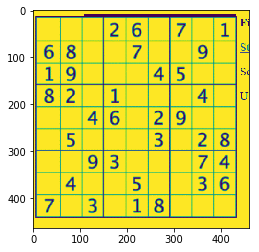

In [45]:
single_line_image = np.copy(img_gray)
lines = transform_lines(lines)
lines.sort(key=lambda tup: tup[1])
x1,y1,x2,y2 = lines[0]
cv.line(single_line_image, (x1,y1), (x2,y2), (0,255,255), 2)
plt.imshow(single_line_image)
print(lines)

Encountered issue with lines: Hough transforms detects several lines for edge of the board. How to find innermost line, so that once image is splitted into single boxes there are no lines in the picture's boarders?

### Dilatation on original image before line detection - doesn't work

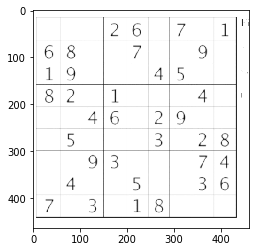

In [50]:
kernel = np.ones((3, 3), np.uint8)
dilated_image = cv.dilate(img_gray, kernel, iterations=1)
plt.imshow(dilated_image, cmap="gray")

### Canny filter before line detection

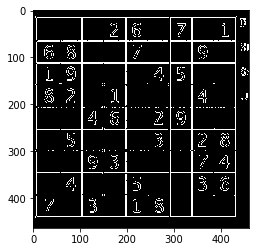

In [82]:
canny_edges = cv.Canny(img_gray, 60, 120)
plt.imshow(canny_edges, cmap="gray")

[(7, 12, 432, 12), (292, 15, 336, 15), (247, 15, 289, 15), (106, 15, 148, 15), (152, 15, 195, 15), (8, 15, 58, 15), (384, 15, 431, 15), (103, 33, 103, 63), (151, 59, 151, 17), (199, 62, 199, 15), (7, 63, 7, 17), (149, 63, 149, 17), (196, 63, 196, 15), (10, 64, 57, 64), (246, 66, 246, 15)]


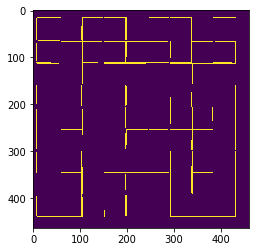

In [83]:
line_image = np.copy(img_gray) * 0

rho = 1
theta = np.pi / 180
threshold = 50 # minimal number of votes
min_line_length = 300
max_line_gap = 30
lines = cv.HoughLinesP(canny_edges, rho, theta, threshold, min_line_length, max_line_gap)

for line in lines:
    x1,y1,x2,y2 = line[0]
    cv.line(line_image, (x1,y1), (x2,y2), (255,0,0), 1)
plt.imshow(line_image)
transformed_lines = transform_lines(lines)
transformed_lines.sort(key=lambda tup: tup[1])
print(transformed_lines[:15])